In [1]:
import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

%matplotlib inline
pd.set_option('display.max_columns', 500)

class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

class BenchmarkDiffFitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent,

class BenchmarkDiff2FitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff2"

    def compute(self, individual, evaluation, genetic_program):
        return (evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent)*evaluation.num_profitable_trades,
    
    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/03/01 00:00:00 UTC",
        "end_time": "2018/03/31 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_function": "ff_v1",
    "grammar_version": "gv1",
    "num_generations": 3,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        50
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_OMG-BTC-1522540800.0-1527811200.0;provider_TAprovider;grammar_gv1;fitness_ff_v1;matingprob_0.9;mutationprob_0.5;populationsize_50;generations_3 already has completed records, skipping...


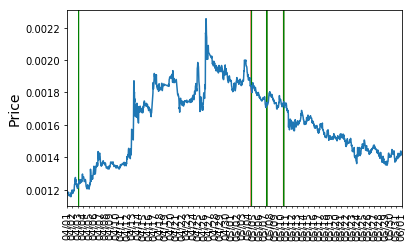

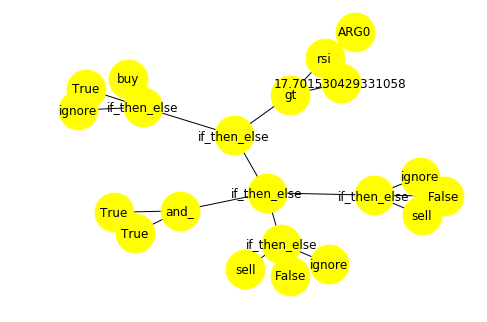

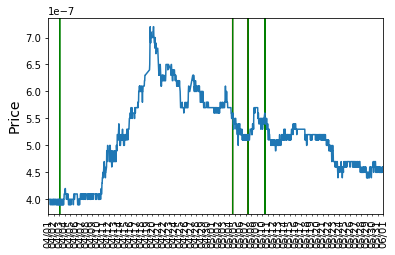

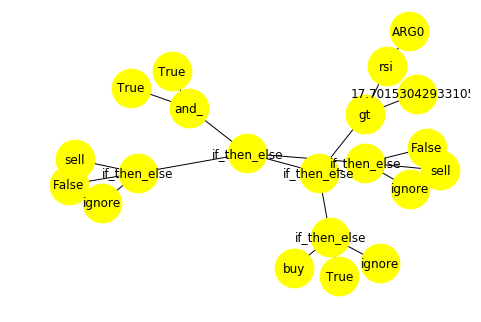

In [2]:
performance_dfs = e.analyze_all_datasets()

In [3]:
performance_dfs[0]

,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
1,-0.003236,14.261649,19.364172,0.999187,OMG,0.0,BTC,793096.747963,0.001415,1.527811e+09,0.0,793096.747963,OMG,0.001415,1.527811e+09,1122.057417,8.391892e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,1,"[<deap.gp.Primitive object at 0x105d48368>, <d...",0.477616,-0.001473,0.477616,-0.413489,2847060.0,0.477616,-0.027441,0.140912,0.477616,-0.053408,-0.053408,3,4,1,2,7,1,3,7,2,0.333333,122.057417,12.205742,21.270111,1.471892e+06,60,0.200389,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.025968,0.239028,0,0.0025,OMG,False
2,-0.003236,14.261649,19.364172,0.999187,OMG,0.0,BTC,793096.747963,0.001415,1.527811e+09,0.0,793096.747963,OMG,0.001415,1.527811e+09,1122.057417,8.391892e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,2,"[<deap.gp.Primitive object at 0x105d48368>, <d...",0.477616,-0.001473,0.477616,-0.413489,2847060.0,0.477616,-0.027441,0.140912,0.477616,-0.053408,-0.053408,3,4,1,2,7,1,3,7,2,0.333333,122.057417,12.205742,21.270111,1.471892e+06,60,0.200389,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.025968,0.239028,0,0.0025,OMG,False
3,-0.003236,14.261649,19.364172,0.999187,OMG,0.0,BTC,793096.747963,0.001415,1.527811e+09,0.0,793096.747963,OMG,0.001415,1.527811e+09,1122.057417,8.391892e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,3,"[<deap.gp.Primitive object at 0x105d48368>, <d...",0.477616,-0.001473,0.477616,-0.413489,2847060.0,0.477616,-0.027441,0.140912,0.477616,-0.053408,-0.053408,3,4,1,2,7,1,3,7,2,0.333333,122.057417,12.205742,21.270111,1.471892e+06,60,0.200389,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.025968,0.239028,0,0.0025,OMG,False
4,-0.003236,14.261649,19.364172,0.999187,OMG,0.0,BTC,793096.747963,0.001415,1.527811e+09,0.0,793096.747963,OMG,0.001415,1.527811e+09,1122.057417,8.391892e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,4,"[<deap.gp.Primitive object at 0x105d48368>, <d...",0.477616,-0.001473,0.477616,-0.413489,2847060.0,0.477616,-0.027441,0.140912,0.477616,-0.053408,-0.053408,3,4,1,2,7,1,3,7,2,0.333333,122.057417,12.205742,21.270111,1.471892e+06,60,0.200389,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.025968,0.239028,0,0.0025,OMG,False
5,-0.003236,14.261649,19.364172,0.999187,OMG,0.0,BTC,793096.747963,0.001415,1.527811e+09,0.0,793096.747963,OMG,0.001415,1.527811e+09,1122.057417,8.391892e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,5,"[<deap.gp.Primitive object at 0x105d48368>, <d...",0.477616,-0.001473,0.477616,-0.413489,2847060.0,0.477616,-0.027441,0.140912,0.477616,-0.053408,-0.053408,3,4,1,2,7,1,3,7,2,0.333333,122.057417,12.205742,21.270111,1.471892e+06,60,0.200389,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.025968,0.239028,0,0.0025,OMG,False
6,-0.003236,14.261649,19.364172,0.999187,OMG

In [4]:
performance_dfs[1]

,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
1,-0.00226,17.359712,22.600584,0.994834,DOGE,0.0,BTC,2.516874e+09,4.600000e-07,1.527811e+09,0.0,2.516874e+09,DOGE,4.600000e-07,1.527811e+09,1157.762070,8.665849e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,1,"[<deap.gp.Primitive object at 0x114649318>, <d...",0.406731,-0.091563,0.406731,-0.398642,2955600.0,0.240481,-0.091563,0.129800,0.074231,-0.091563,-0.091563,3,4,2,1,7,2,3,7,1,0.666667,157.762070,15.776207,25.229033,1.745849e+06,60,0.229710,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166250,0.000000,0.207187,0,0.0025,DOGE,False
2,-0.00226,17.359712,22.600584,0.994834,DOGE,0.0,BTC,2.516874e+09,4.600000e-07,1.527811e+09,0.0,2.516874e+09,DOGE,4.600000e-07,1.527811e+09,1157.762070,8.665849e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,2,"[<deap.gp.Primitive object at 0x114649318>, <d...",0.406731,-0.091563,0.406731,-0.398642,2955600.0,0.240481,-0.091563,0.129800,0.074231,-0.091563,-0.091563,3,4,2,1,7,2,3,7,1,0.666667,157.762070,15.776207,25.229033,1.745849e+06,60,0.229710,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166250,0.000000,0.207187,0,0.0025,DOGE,False
3,-0.00226,17.359712,22.600584,0.994834,DOGE,0.0,BTC,2.516874e+09,4.600000e-07,1.527811e+09,0.0,2.516874e+09,DOGE,4.600000e-07,1.527811e+09,1157.762070,8.665849e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,3,"[<deap.gp.Primitive object at 0x114649318>, <d...",0.406731,-0.091563,0.406731,-0.398642,2955600.0,0.240481,-0.091563,0.129800,0.074231,-0.091563,-0.091563,3,4,2,1,7,2,3,7,1,0.666667,157.762070,15.776207,25.229033,1.745849e+06,60,0.229710,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166250,0.000000,0.207187,0,0.0025,DOGE,False
4,-0.00226,17.359712,22.600584,0.994834,DOGE,0.0,BTC,2.516874e+09,4.600000e-07,1.527811e+09,0.0,2.516874e+09,DOGE,4.600000e-07,1.527811e+09,1157.762070,8.665849e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,4,"[<deap.gp.Primitive object at 0x114649318>, <d...",0.406731,-0.091563,0.406731,-0.398642,2955600.0,0.240481,-0.091563,0.129800,0.074231,-0.091563,-0.091563,3,4,2,1,7,2,3,7,1,0.666667,157.762070,15.776207,25.229033,1.745849e+06,60,0.229710,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166250,0.000000,0.207187,0,0.0025,DOGE,False
5,-0.00226,17.359712,22.600584,0.994834,DOGE,0.0,BTC,2.516874e+09,4.600000e-07,1.527811e+09,0.0,2.516874e+09,DOGE,4.600000e-07,1.527811e+09,1157.762070,8.665849e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,5,"[<deap.gp.Primitive object at 0x114649318>, <d...",0.406731,-0.091563,0.406731,-0.398642,2955600.0,0.240481,-0.091563,0.129800,0.074231,-0.091563,-0.091563,3,4,2,1,7,2,3,7,1,0.666667,157.762070,15.776207,25.229033,1.745849e+06,60,0.229710,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166250,0.000000,0.207187,0,0.0025,DOGE,False
6,-0

Experiment id: run_evolution.data_OMG-BTC-1522540800.0-1527811200.0;provider_TAprovider;grammar_gv1;fitness_ff_v1;matingprob_0.9;mutationprob_0.5;populationsize_50;generations_3

String representation:
if_then_else(gt(17.701530429331058, rsi(ARG0)), if_then_else(and_(True, True), if_then_else(False, ignore, sell), if_then_else(False, sell, ignore)), if_then_else(True, buy, ignore))



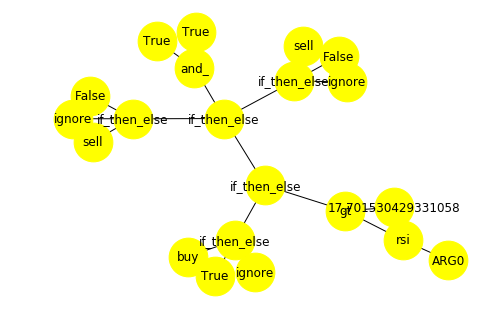

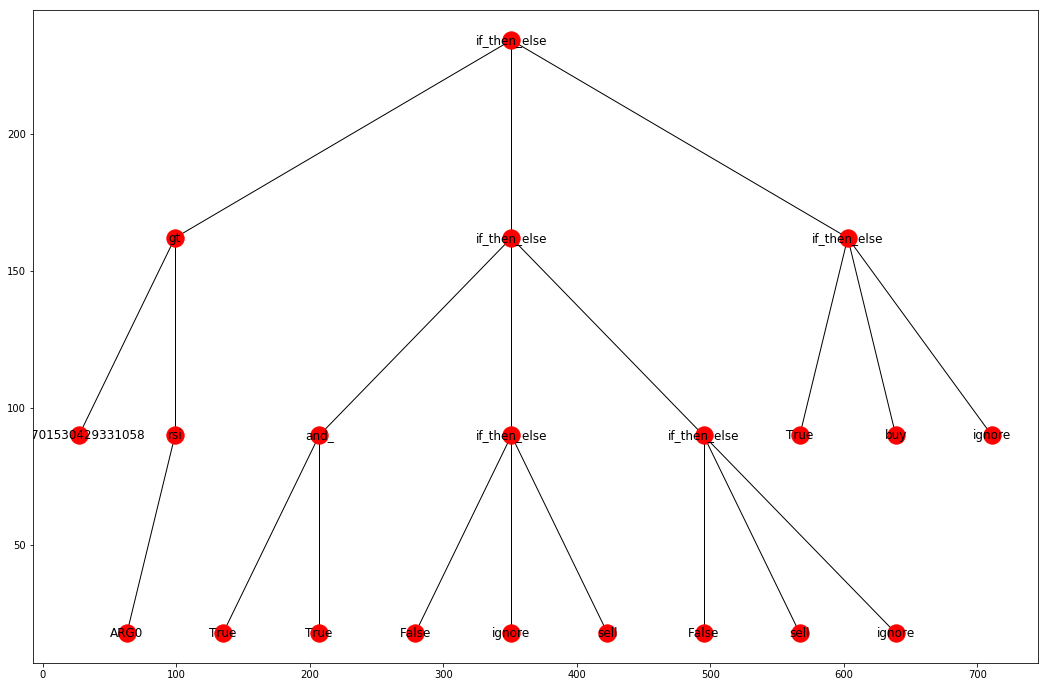

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-03 03:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 809652.519054 OMG 	 (1 OMG = 0.00123201 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-03 03:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1473.92 BTC 	 currency_balance -> -809652.519054 OMG 	 (1 OMG = 0.00182500 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1473.92 BTC 	 currency_balance -> 810226.497926 OMG 	 (1 OMG = 0.00181460 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1391.71 BTC 	 currenc

In [5]:
best = e.performance_df_row_info(performance_dfs[0].iloc[0])

In [6]:
doge = DogeDNACanvas(best,"container")
HTML(doge.create_container())

In [7]:
Javascript(doge.show())

<IPython.core.display.Javascript object>

### Random thoughts
* perhaps a great doge baby would be found in more generations
* when the market is bearish, some top performing strategies produce no trades (bug or feature?)
* in bullish markets, we see babies that sell and then buy again immediately - unrealistic
* keep reseeding initial population until some individual with good fitness is found 
* alternative: seed initial population with good individuals (e.g. RSI strategy, etc.) 
* compress babies by evaluating expressions within them (for instance 'if False')
* overfitting should be solved by evaluating babies over different time periods / currencies?
